In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import warnings
warnings.filterwarnings('ignore')

In [2]:
from forecasting_models.univariate_models.arima.model import ARIMAForecastModel
from forecasting_models.univariate_models.lstm.model import LSTMForecastModel
from data_utils.csv_utils import read_timeseries_csv

In [3]:
dataset = read_timeseries_csv("./examples/sample_data/univar_data/cpu_example_5min.csv")

dataset.shape

(4032, 1)

In [4]:
enable_plotting = True
n_splits = 3

In [5]:
lstm_model = LSTMForecastModel("./examples/configs/lstm/lstm_example_6_step.yaml")

** FOLD n.1 **
Training dataset plot:


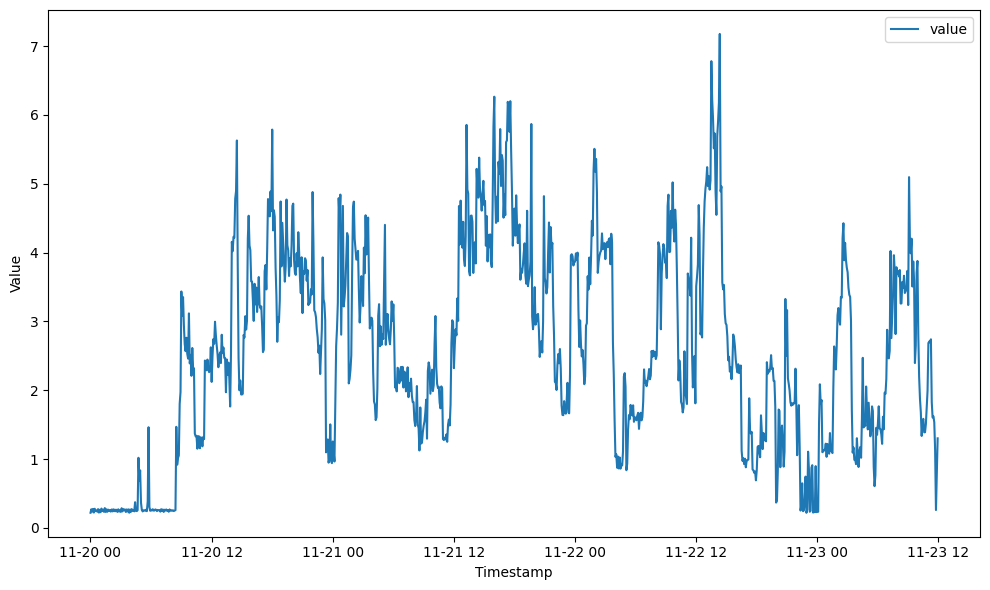

Fold n.1 evaluation result plot:


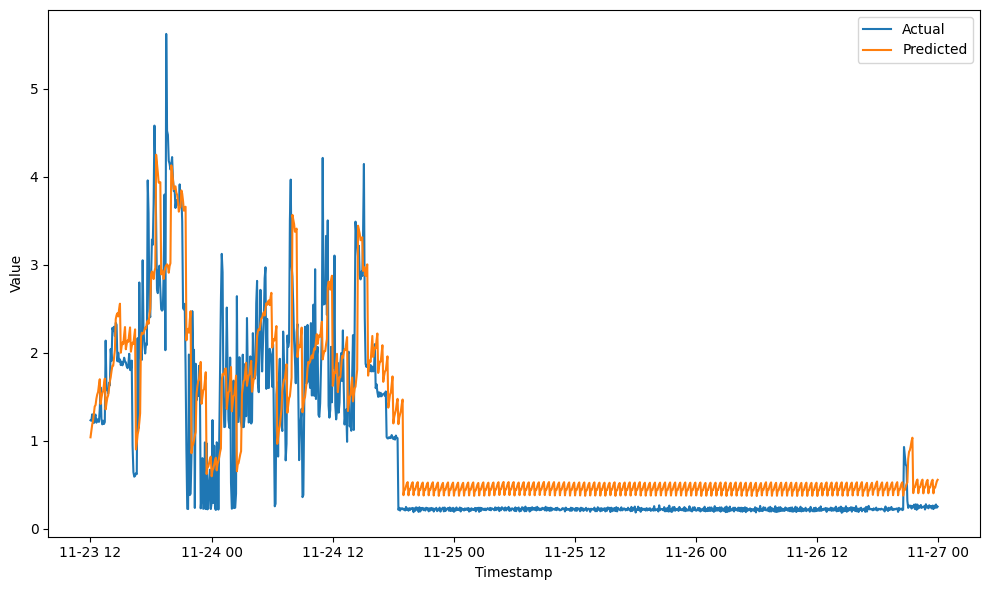

-----------------------------------------

** FOLD n.2 **
Training dataset plot:


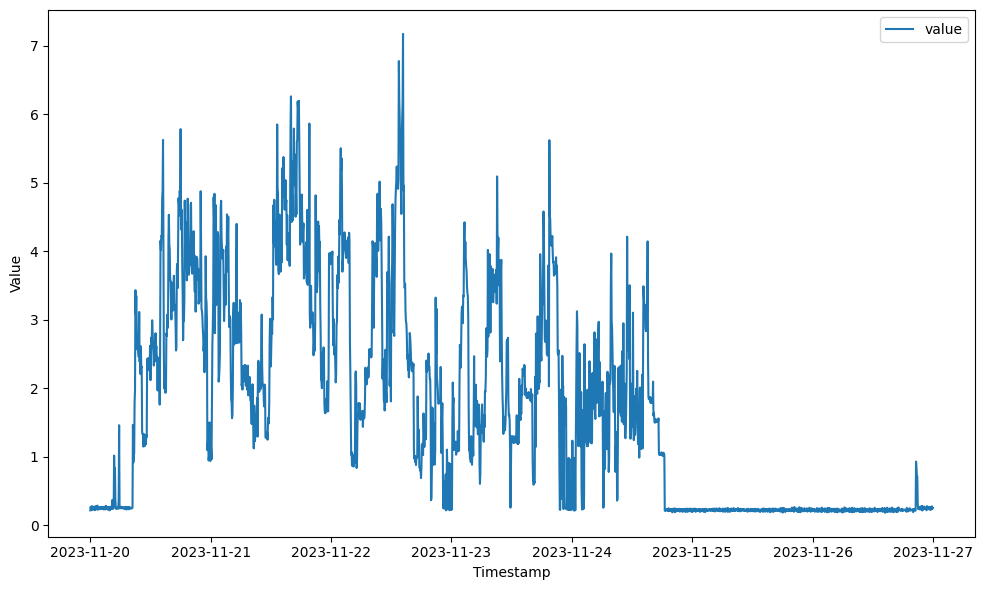

Fold n.2 evaluation result plot:


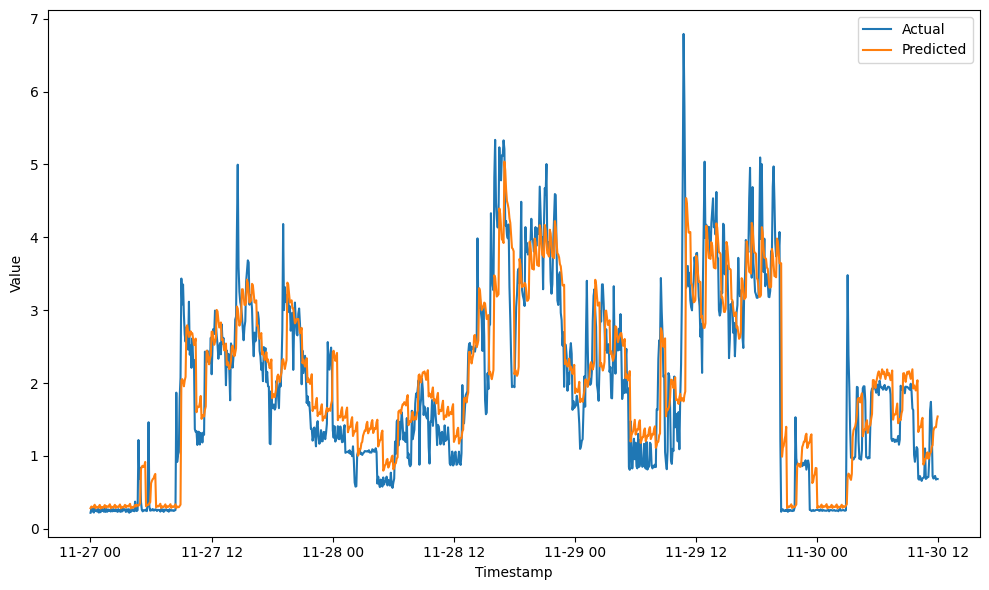

-----------------------------------------

** FOLD n.3 **
Training dataset plot:


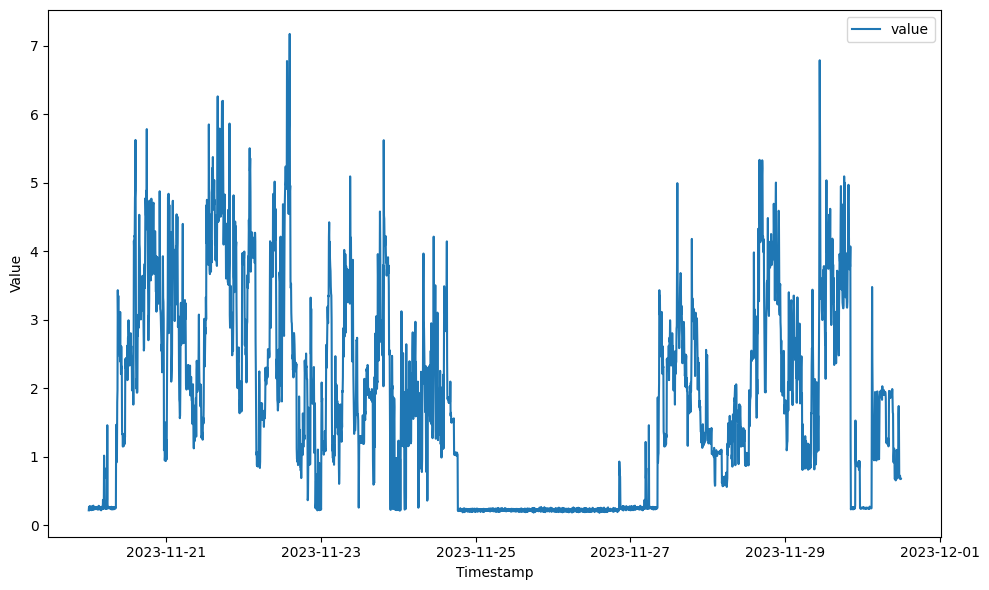

Fold n.3 evaluation result plot:


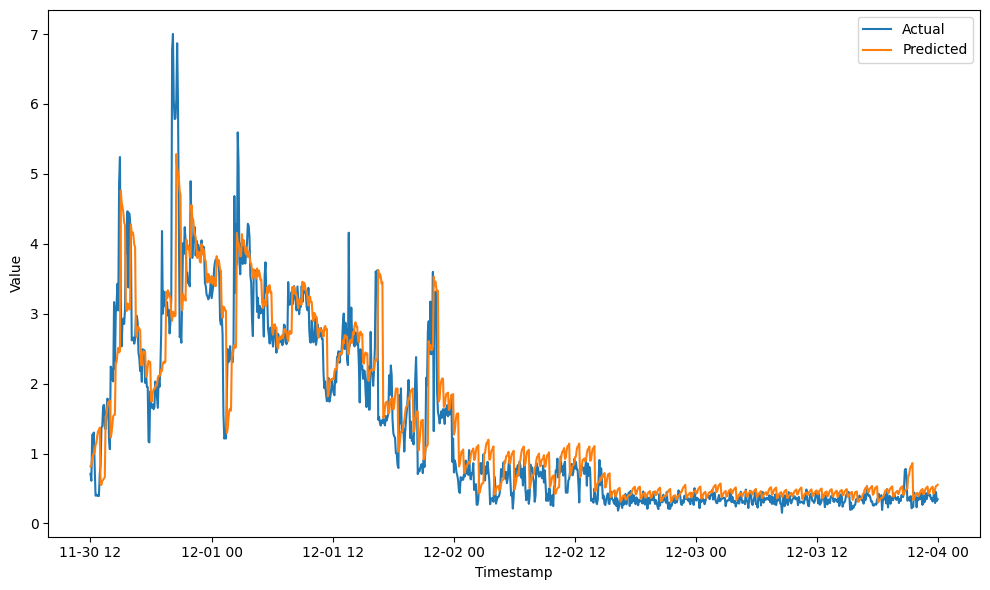

-----------------------------------------



In [6]:
from tensorflow.keras.layers import LSTM
from ts_cross_validation import lstm_eval_ts_cross_validation

lstm_evals_df = lstm_eval_ts_cross_validation(
    lstm_model,
    dataset.copy(),
    custom_inner_layers=[
        LSTM(64),
    ],
    enable_plotting=enable_plotting,
    n_splits=n_splits,
)

In [7]:
lstm_evals_df

,rmse,mse,mape,mae,r2
Fold 1,0.526234,0.276923,95.259950,0.382327,0.710952
Fold 2,0.625095,0.390744,34.716624,0.433068,0.756167
Fold 3,0.544974,0.296996,37.378766,0.319736,0.823245


** FOLD n.1 **
Training dataset plot:


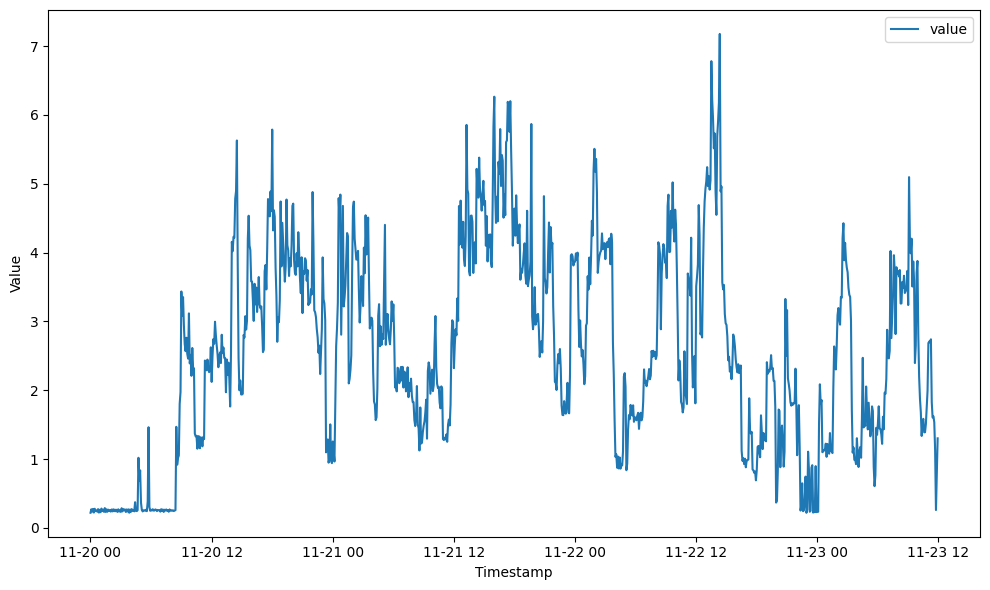

Fold n.1 evaluation result plot:


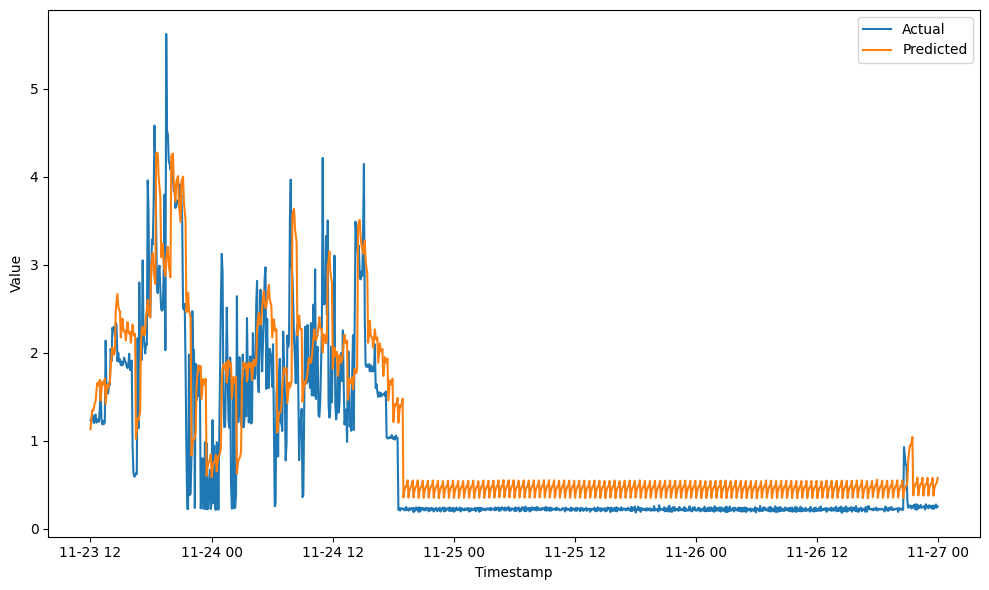

-----------------------------------------

** FOLD n.2 **
Training dataset plot:


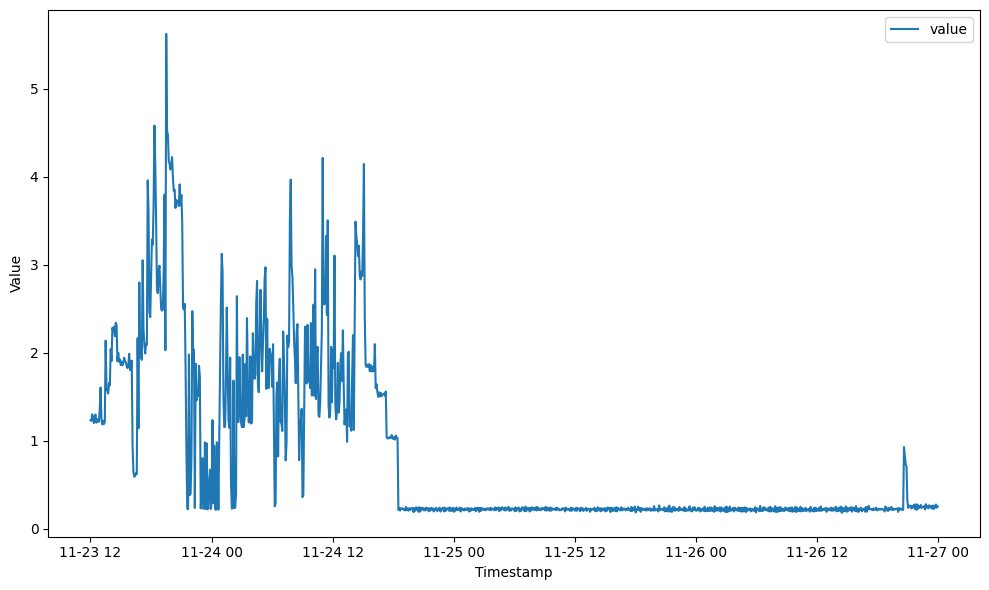

Fold n.2 evaluation result plot:


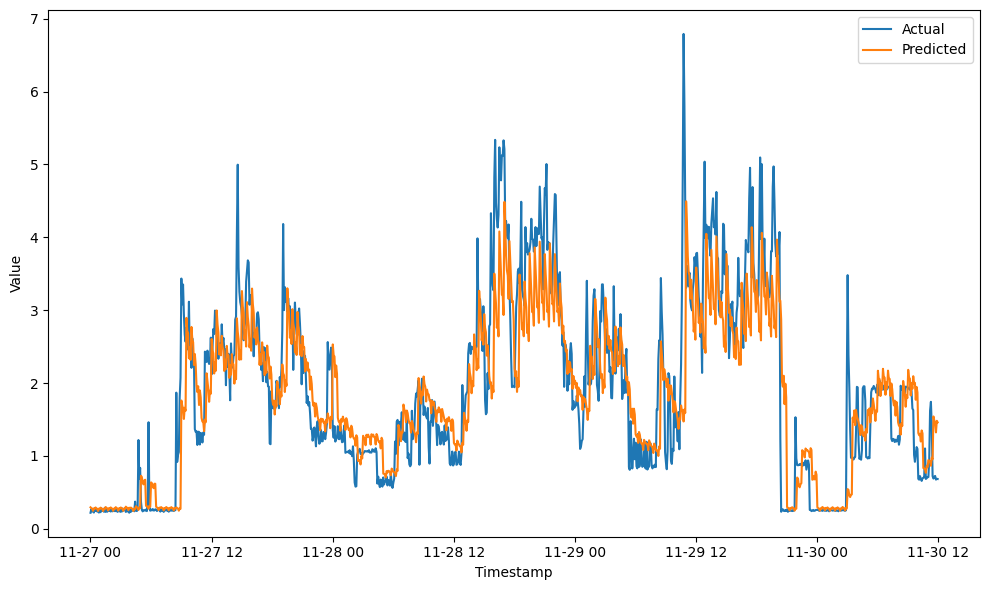

-----------------------------------------

** FOLD n.3 **
Training dataset plot:


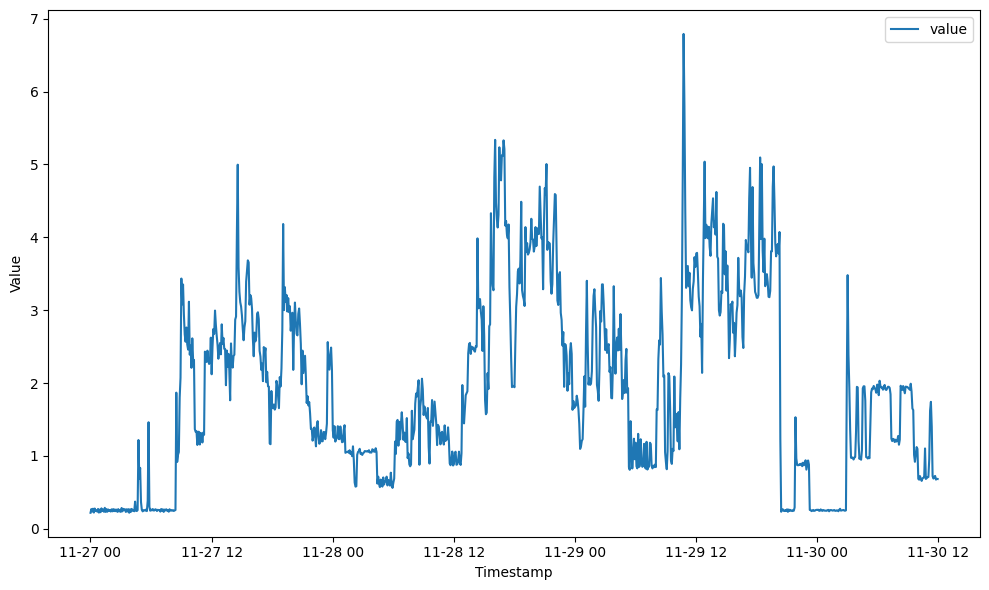

Fold n.3 evaluation result plot:


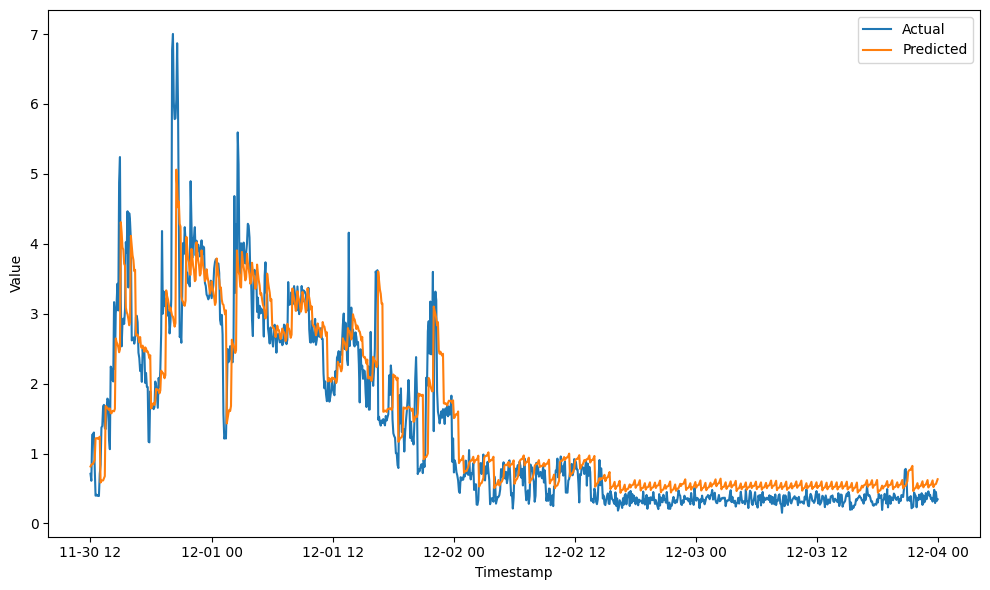

-----------------------------------------



In [8]:
from ts_cross_validation import lstm_eval_rolling_ts_cross_validation


lstm_rolling_evals_df = lstm_eval_rolling_ts_cross_validation(
    lstm_model,
    dataset.copy(),
    custom_inner_layers=[
        LSTM(64),
    ],
    enable_plotting=enable_plotting,
    n_splits=n_splits,
)

In [9]:
lstm_rolling_evals_df

,rmse,mse,mape,mae,r2
Fold 1,0.540815,0.292481,95.784524,0.391702,0.694713
Fold 2,0.686310,0.471022,33.117294,0.461620,0.706071
Fold 3,0.548900,0.301292,46.812816,0.352784,0.820688


In [10]:
arima_model = ARIMAForecastModel("./examples/configs/arima/arima_example_6_step.yaml")

** FOLD n.1 **
Training dataset plot:


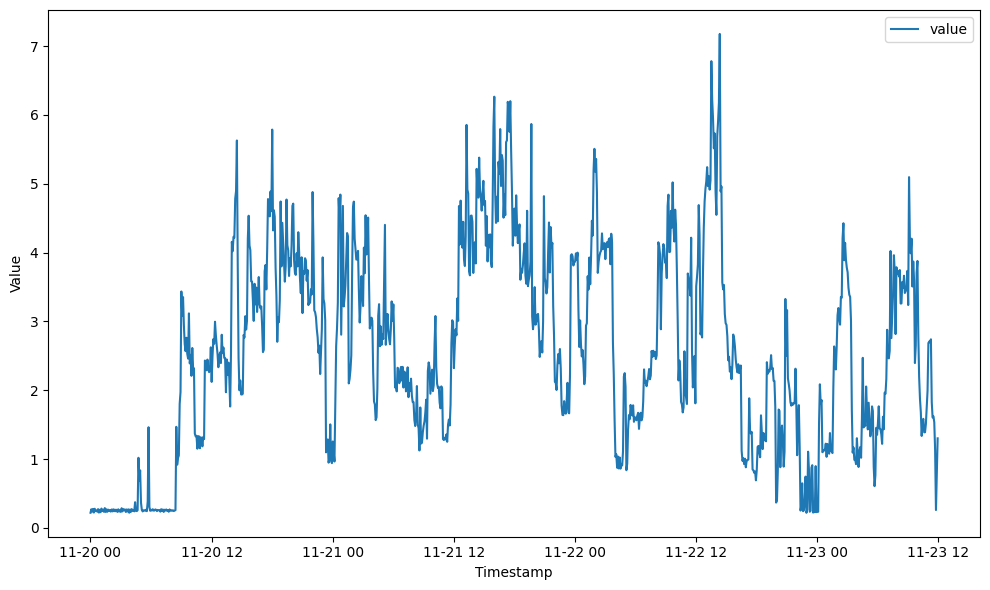

Fold n.1 evaluation result plot:


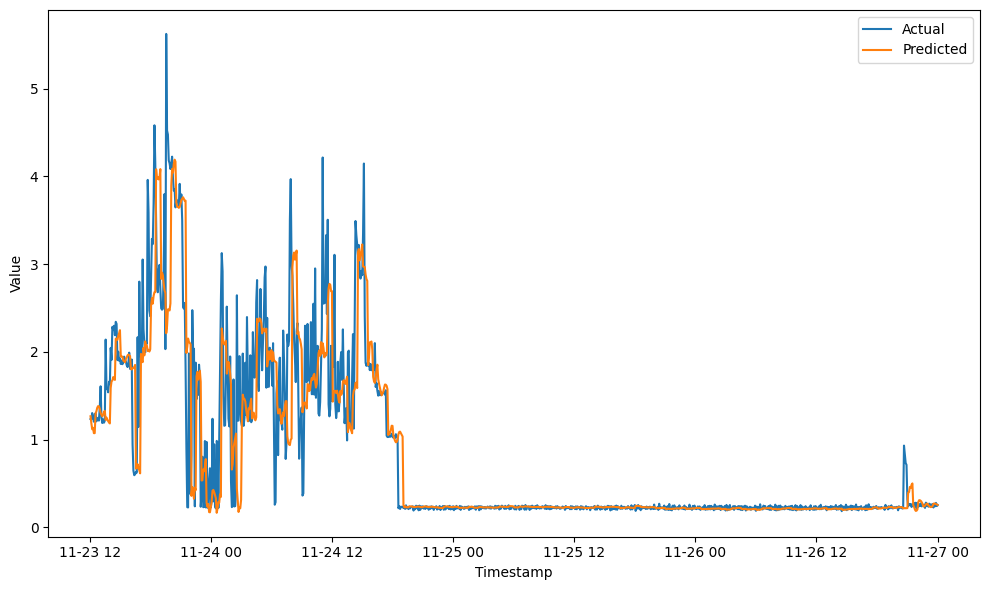

-----------------------------------------

** FOLD n.2 **
Training dataset plot:


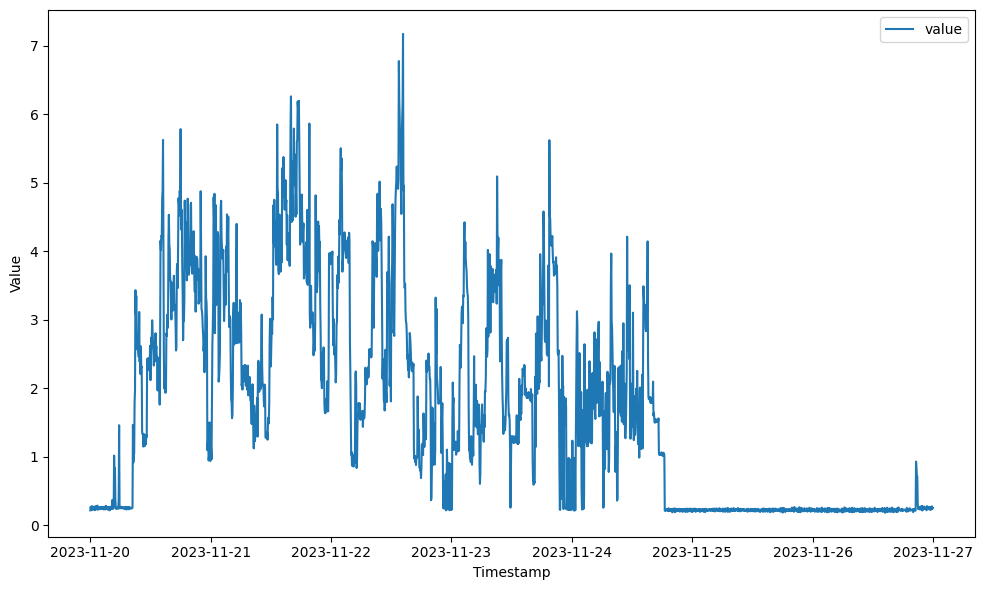

Fold n.2 evaluation result plot:


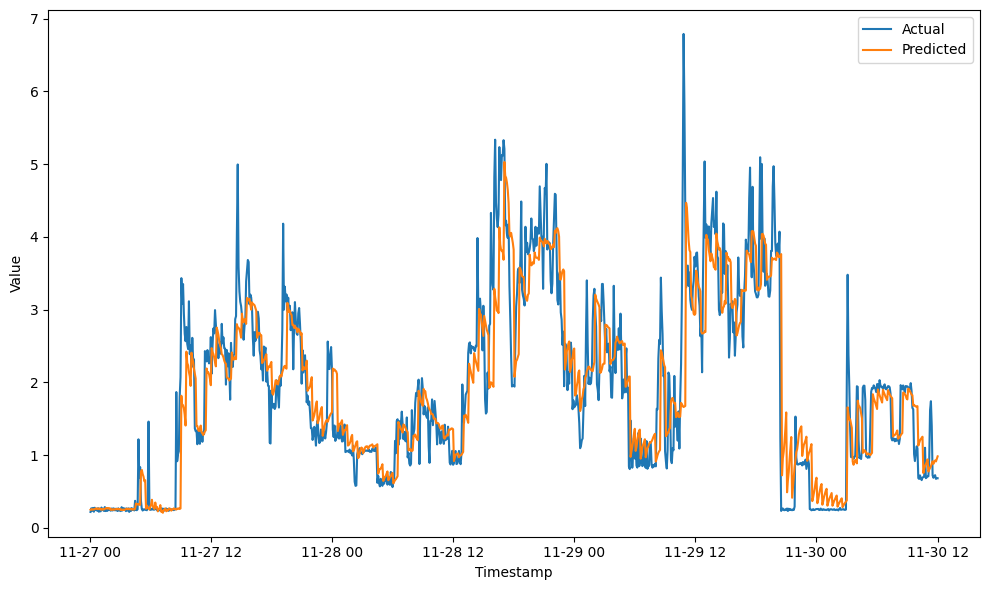

-----------------------------------------

** FOLD n.3 **
Training dataset plot:


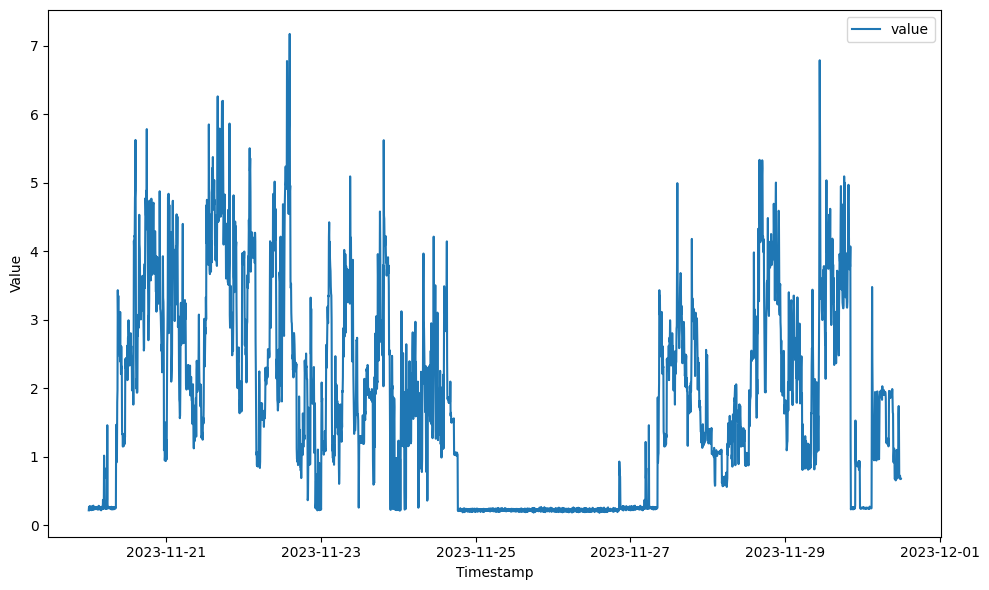

Fold n.3 evaluation result plot:


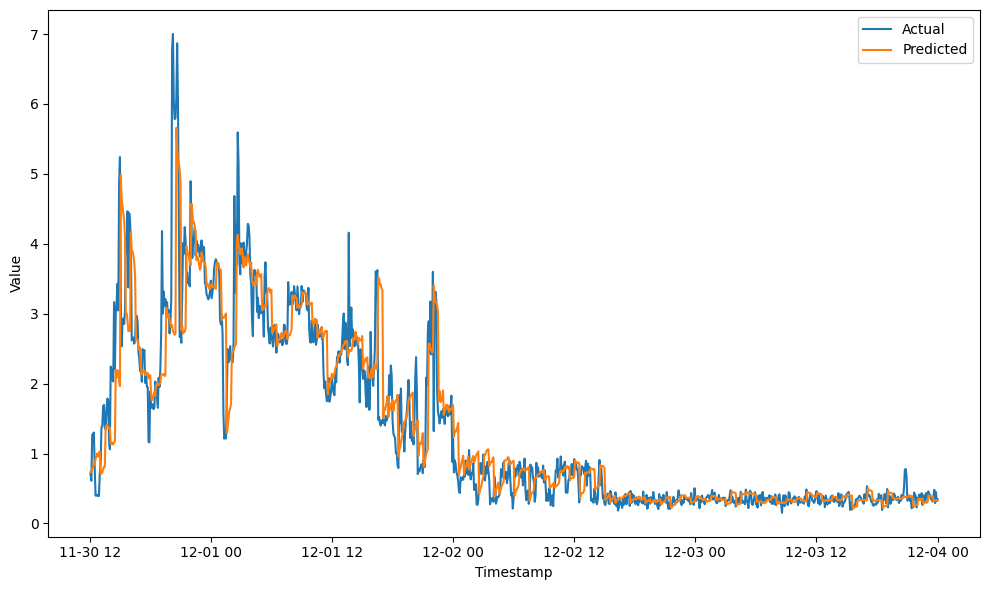

-----------------------------------------



In [11]:
from ts_cross_validation import arima_eval_ts_cross_validation


arima_evals_df = arima_eval_ts_cross_validation(
    arima_model,
    dataset.copy(),
    enable_plotting=enable_plotting,
    n_splits=n_splits,
)

In [12]:
arima_evals_df

,rmse,mse,mape,mae,r2
Fold 1,0.495259,0.245281,24.499212,0.225397,0.743979
Fold 2,0.613627,0.376538,29.746013,0.394654,0.765031
Fold 3,0.539767,0.291349,27.509977,0.286863,0.826606


** FOLD n.1 **
Training dataset plot:


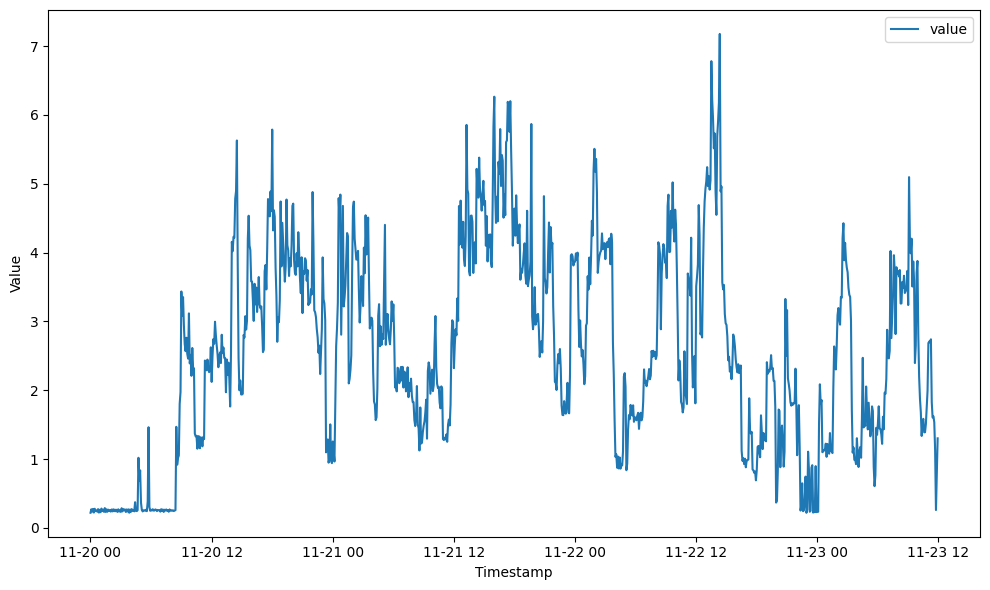

Fold n.1 evaluation result plot:


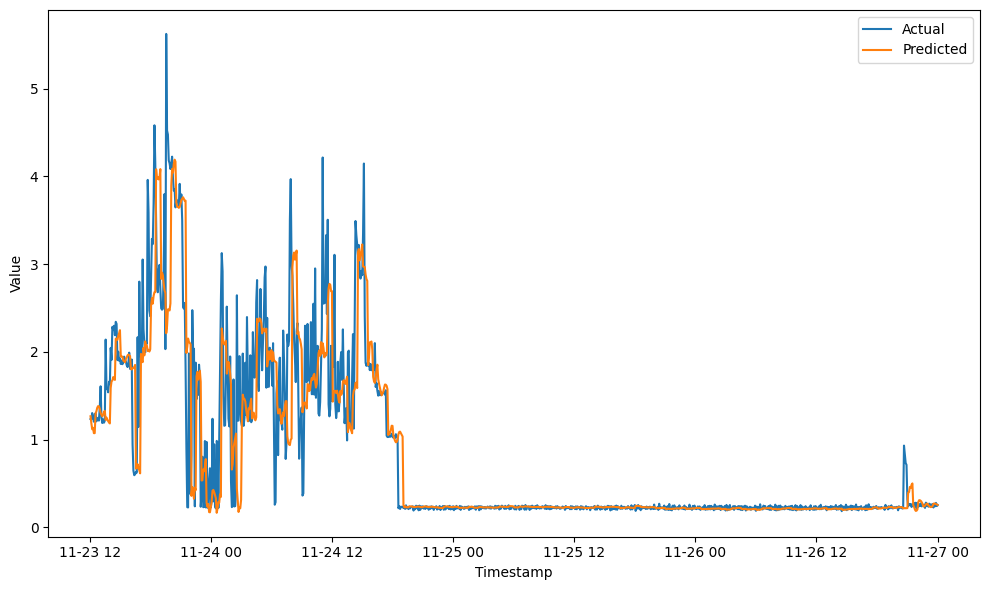

-----------------------------------------

** FOLD n.2 **
Training dataset plot:


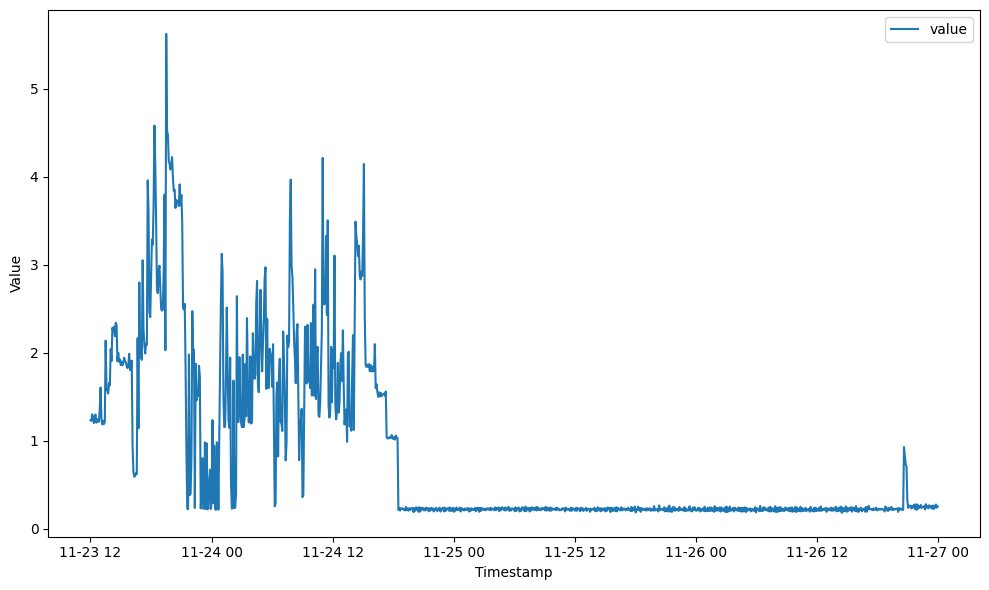

Fold n.2 evaluation result plot:


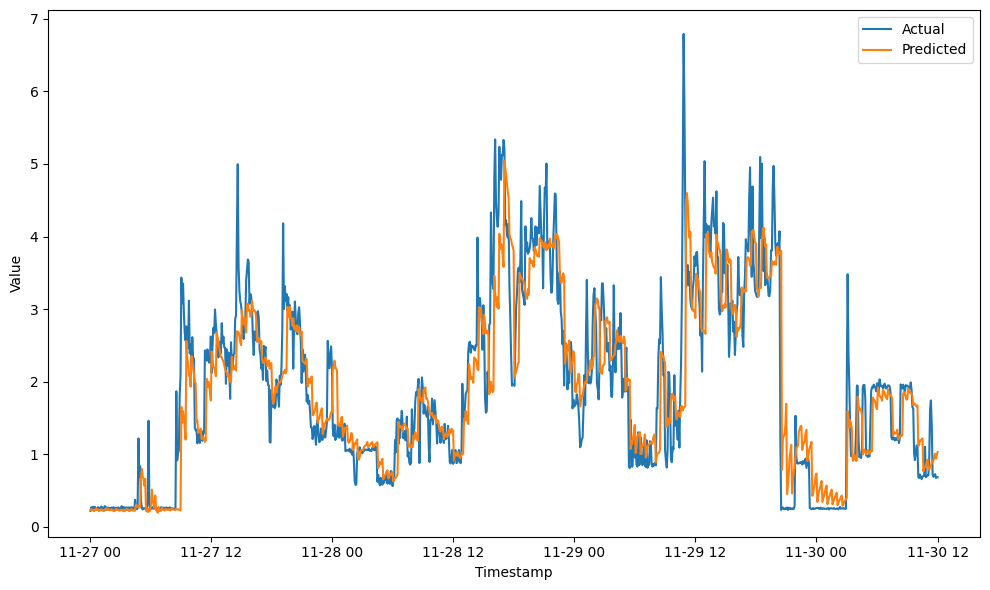

-----------------------------------------

** FOLD n.3 **
Training dataset plot:


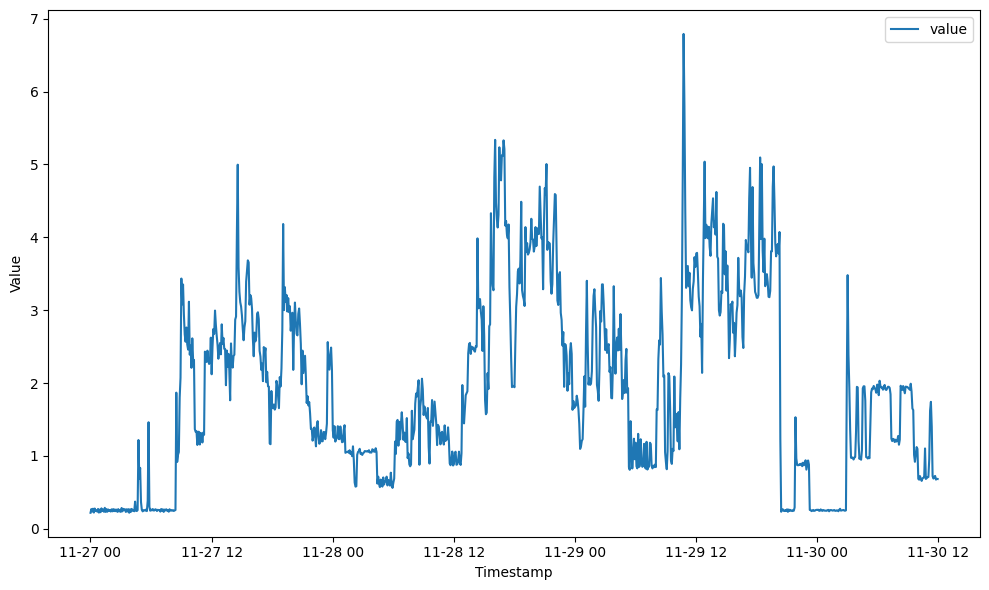

Fold n.3 evaluation result plot:


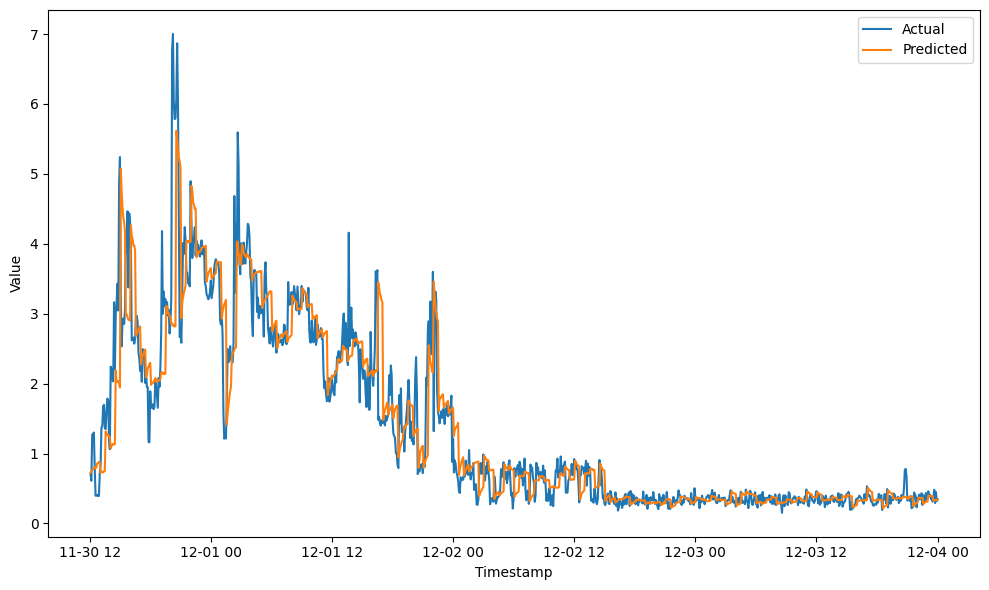

-----------------------------------------



In [13]:
from ts_cross_validation import arima_eval_rolling_ts_cross_validation


arima_rolling_evals_df = arima_eval_rolling_ts_cross_validation(
    arima_model,
    dataset.copy(),
    enable_plotting=enable_plotting,
    n_splits=n_splits,
)

In [14]:
arima_rolling_evals_df

,rmse,mse,mape,mae,r2
Fold 1,0.495259,0.245281,24.499212,0.225397,0.743979
Fold 2,0.626027,0.391910,30.904169,0.405838,0.755439
Fold 3,0.538919,0.290434,26.186315,0.285960,0.827150
